## Image Classification with CNN for CIFAR_10

In [2]:
#import the packages that we need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar10

In [4]:
# download the dataset
(x_train,y_train) , (x_test, y_test) = cifar10.load_data() 

In [8]:
x_train.shape

(50000, 32, 32, 3)

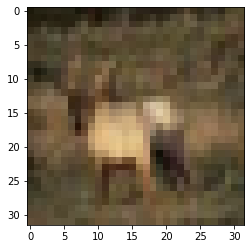

In [10]:
plt.imshow(x_train[3]) 

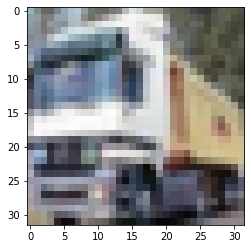

In [11]:
plt.imshow(x_train[1]) 

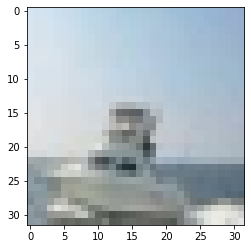

In [12]:
plt.imshow(x_train[100]) 

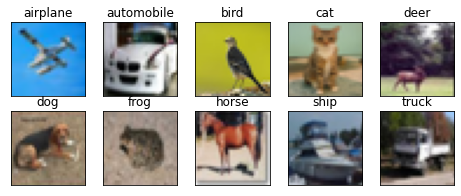

In [14]:
#Picture datas in different categories
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = 10

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show() 

In [15]:
x_train = x_train/255

In [16]:
x_test = x_test/255

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_dog_train  = to_categorical(y_train, 10)

In [19]:
y_dog_test = to_categorical(y_test, 10)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [21]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [25]:

model.fit(x_train, y_dog_train, validation_data = (x_test, y_dog_test), epochs = 10, callbacks = [early_stop])

Epoch 1/10
1563/1563 [==============================] - 100s 59ms/step - loss: 1.5076 - accuracy: 0.4457 - val_loss: 1.3018 - val_accuracy: 0.5377
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.1205 - accuracy: 0.6065 - val_loss: 1.1095 - val_accuracy: 0.6180
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9133 - accuracy: 0.6792 - val_loss: 0.9433 - val_accuracy: 0.6727
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7653 - accuracy: 0.7324 - val_loss: 0.9438 - val_accuracy: 0.6769
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6374 - accuracy: 0.7777 - val_loss: 0.9340 - val_accuracy: 0.6917
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.5183 - accuracy: 0.8176 - val_loss: 1.0343 - val_accuracy: 0.6831
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.4114 - accuracy: 0.8553 - val_loss: 1.1261 

In [26]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.507581,0.44572,1.301827,0.5377
1,1.120469,0.60652,1.109477,0.6180
2,0.913317,0.67924,0.943257,0.6727
3,0.765327,0.73242,0.943755,0.6769
4,0.637376,0.77768,0.933970,0.6917
5,0.518348,0.81764,1.034319,0.6831
6,0.411394,0.85528,1.126106,0.6868


<AxesSubplot:>

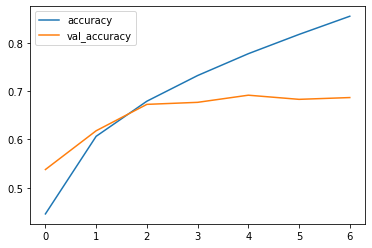

In [27]:
metrics[["accuracy", "val_accuracy"]].plot()

<AxesSubplot:>

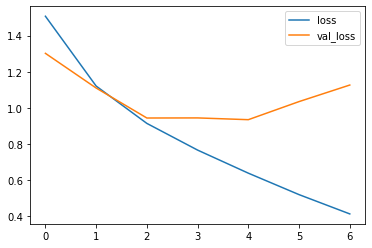

In [28]:
metrics[["loss", "val_loss"]].plot()